In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('titanic3.csv', sep =';')

# Gráfico com Dados Ausentes

<AxesSubplot:>

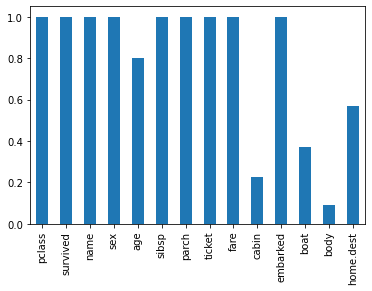

In [8]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(6, 4)) 
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

# Dados Faltantes
##### *Retirando colunas com 40% de dados ausentes

In [33]:
Porcentagem = df.shape[0]*0.4

In [34]:
df_dropna_thresh = df.dropna(thresh= Porcentagem , axis = 1) 
df_dropna_thresh

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1304,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN
1305,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN
1306,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN
1307,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN


# Colunas Informativas
#### * Indicar dados Faltantes nas Colunas

In [39]:
def add_indicator(col):
    def whapper(df):
        return df[col].isna().astype(int)
    return whapper

In [98]:
#Age dados faltantes
df1 = df_dropna_thresh.assign(age_dados_ausentes = add_indicator('age'))

In [99]:
# embarked dados faltantes
df1 = df1.assign(embarked_dados_ausentes = add_indicator('embarked'))

In [100]:
df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,age_dados_ausentes,embarked_dados_ausentes
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO",0,0
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN,0,0
1305,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN,1,0
1306,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN,0,0
1307,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN,0,0


# Imputar dados
- Imputar 'age' pela mediana da coluna
- Imputar 'Embarked' pela moda da coluna


In [101]:
df1['age'].fillna(df1['age'].median(), inplace=True)

In [102]:
df1['embarked'].fillna(df1['embarked'].mode(), inplace=True)

# Retirando linha que possui qualquer dado faltante 

In [103]:
df1 = df1.dropna()

# Mapear as variáveis ordinais

In [104]:
df1['pclass'] = df1['pclass'].map({'1st':1, '2nd':2, '3rd': 3})

C:\Users\192212~1\AppData\Local\Temp/ipykernel_2268/373471414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pclass'] = df1['pclass'].map({'1st':1, '2nd':2, '3rd': 3})


# Aplicar LabelEncoder

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le = LabelEncoder()

In [107]:
df1['sex'] = le.fit_transform(df1['sex'].values)

C:\Users\192212~1\AppData\Local\Temp/ipykernel_2268/2542247352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex'] = le.fit_transform(df1['sex'].values)


# Aplicar OneHotEncoder

In [108]:
df1_dummy = pd.get_dummies(df1[['embarked']])

In [109]:
df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,age_dados_ausentes,embarked_dados_ausentes
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,S,"St Louis, MO",0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,3,0,"Gustafsson, Mr. Johan Birger",1,28.0000,2,0,3101277,7.9250,S,"Ruotsinphytaa, Finland New York, NY",0,0
839,3,0,"Gustafsson, Mr. Karl Gideon",1,19.0000,0,0,347069,7.7750,S,"Myren, Sweden New York, NY",0,0
1063,3,0,"Nirva, Mr. Iisakki Antino Aijo",1,41.0000,0,0,SOTON/O2 3101272,7.1250,S,"Finland Sudbury, ON",0,0
1089,3,0,"Olsvigen, Mr. Thor Anderson",1,20.0000,0,0,6563,9.2250,S,"Oslo, Norway Cameron, WI",0,0


# Reescalonamento nas colunas 'age' e 'fare'. 
- Verifique qual coluna tem o maior e menor desvio padrão e aplique um StandardScaler e MinMaxScaler, respectivamente

In [110]:
#Menor desvio Padrão < - MinMaxScaler
df1.age.std()

14.518443570246415

In [111]:
#Maior desvio Padrão < - StandardScaler
df1.fare.std()

55.247164136670044

## StandardScaler 

In [113]:
from sklearn.preprocessing import StandardScaler

In [117]:
ss = StandardScaler()
df_ss = ss.fit_transform(df1[['fare']])

In [118]:
df_ss

array([[ 3.05499425e+00],
       [ 1.97208400e+00],
       [ 1.97208400e+00],
       [ 1.97208400e+00],
       [ 1.97208400e+00],
       [-2.91997643e-01],
       [ 6.39143064e-01],
       [-7.72888584e-01],
       [ 1.59536310e-01],
       [ 1.23763820e-01],
       [ 3.34819282e+00],
       [ 3.34819282e+00],
       [ 4.82318279e-01],
       [-2.29508990e-01],
       [-3.03318051e-01],
       [ 3.71036981e+00],
       [ 3.71036981e+00],
       [ 5.89938230e-01],
       [ 1.79007412e-01],
       [ 1.79007412e-01],
       [-2.29508990e-01],
       [-3.01959602e-01],
       [ 8.76797374e-01],
       [ 8.76797374e-01],
       [-2.91997643e-01],
       [-1.29889397e-01],
       [-2.11396337e-01],
       [ 2.21328477e+00],
       [-2.91997643e-01],
       [-2.91997643e-01],
       [ 3.97941878e+00],
       [ 2.23307339e-01],
       [-2.91997643e-01],
       [-2.20452663e-01],
       [ 1.41724327e-01],
       [-5.56275195e-02],
       [-2.70791349e-01],
       [ 1.59536310e-01],
       [ 6.0

## MinMaxScaler

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
mms = MinMaxScaler()

In [122]:
df_mms = mms.fit_transform(df1[['age']])

In [123]:
df_mms

array([[0.36116884],
       [0.00939458],
       [0.0229641 ],
       [0.37369494],
       [0.31106443],
       [0.59916476],
       [0.78705628],
       [0.48642985],
       [0.66179527],
       [0.88726509],
       [0.58663866],
       [0.22338172],
       [0.29853833],
       [1.        ],
       [0.34864273],
       [0.29853833],
       [0.62421696],
       [0.44885154],
       [0.46137765],
       [0.58663866],
       [0.32359053],
       [0.31106443],
       [0.31106443],
       [0.23590782],
       [0.34864273],
       [0.56158646],
       [0.49895595],
       [0.37369494],
       [0.72442577],
       [0.52400815],
       [0.56158646],
       [0.27348613],
       [0.34864273],
       [0.51148205],
       [0.59916476],
       [0.34864273],
       [0.54906035],
       [0.73695187],
       [0.74947797],
       [0.56158646],
       [0.52400815],
       [0.66179527],
       [0.44885154],
       [0.72442577],
       [0.41127324],
       [0.34864273],
       [0.21085562],
       [0.135